In [1]:
# Look at this article for guidance https://medium.com/@c.chaitanya/language-identification-in-python-using-fasttext-60359dc30ed0
# Don't forget to get the posts DB and the classifier model .bin file
import logging
from modules.deso_v2 import Posts
import pandas as pd
import fasttext


In [2]:
def get_posts(num_to_fetch=10, last_post_hash=""):
    """Get posts from DeSo blockchain
    Arguments:
        last_post_hash: Hash of last post to use as pointer (default "")
    Returns:
        list: List of posts in JSON format
    """
    post_list = []
    try:
        posts = Posts.getPostsStateless(
            postHash=last_post_hash, numToFetch=num_to_fetch, orderBy="newest"
        )
    except Exception:  # pylint: disable=broad-except
        logging.error("get_posts: Failed to read posts from blockchain")
        return None
    if "PostsFound" not in posts:
        return None
    if posts["PostsFound"] is None:
        return None
    for post in posts["PostsFound"]:
        if "Body" in post and post["Body"] != "" and "PostHashHex" in post:
            post_list.append(post)
    return post_list




In [40]:
my_posts = get_posts(10000)

In [41]:
len(my_posts)


9776

In [42]:
df = pd.DataFrame(my_posts)
df.dtypes

PostHashHex                       object
PosterPublicKeyBase58Check        object
ParentStakeID                     object
Body                              object
ImageURLs                         object
VideoURLs                         object
RepostedPostEntryResponse         object
CreatorBasisPoints                 int64
StakeMultipleBasisPoints           int64
TimestampNanos                     int64
IsHidden                            bool
ConfirmationBlockHeight            int64
InMempool                           bool
ProfileEntryResponse              object
Comments                          object
LikeCount                          int64
DiamondCount                       int64
PostEntryReaderState              object
IsPinned                            bool
PostExtraData                     object
CommentCount                       int64
RepostCount                        int64
QuoteRepostCount                   int64
ParentPosts                       object
IsNFT           

In [43]:
df['Body']

0                              Somethin sandy in horizon.
1       The BirthBlock is the DeSo blockchain block in...
2       if i dump all my crypto right now, i might hav...
3       🐳 @STK_Sien bought 0.744998159 $STK_wind for $...
4                                 we wanna hear from you!
                              ...                        
9771    💎 Weekend Diamond Game!\nAnswer the question b...
9772    Wordle 296 4/6*\n\n\nmy accessible results:\n\...
9773               Sunday vibes \n\nPosted via @cloutfeed
9774                        DeSo will reach the moon 🚀✍🏻💫
9775    I’m seriously excited! My new Deso exclusive N...
Name: Body, Length: 9776, dtype: object

In [44]:
pretrained_lang_model = "./lid.176.bin"
model = fasttext.load_model(pretrained_lang_model)


In [45]:
results=[]
for text in df['Body'].astype('str'):
    # print(text)
    text=text.replace('\n'," ")
    # predictions = model.predict('test', k=2) # returns top 2 matching languages
    predictions = model.predict(text, k=2) # returns top 2 matching languages
    # print(predictions, text)
    results.append((text,predictions[0][0]))


In [46]:
df2 = pd.DataFrame(results)


In [47]:
df2

,0,1
0,Somethin sandy in horizon.,__label__en
1,The BirthBlock is the DeSo blockchain block in...,__label__en
2,"if i dump all my crypto right now, i might hav...",__label__en
3,🐳 @STK_Sien bought 0.744998159 $STK_wind for $...,__label__en
4,we wanna hear from you!,__label__en
...,...,...
9771,💎 Weekend Diamond Game! Answer the question be...,__label__en
9772,Wordle 296 4/6* my accessible results: Line...,__label__en
9773,Sunday vibes Posted via @cloutfeed,__label__en
9774,DeSo will reach the moon 🚀✍🏻💫,__label__en


<AxesSubplot:>

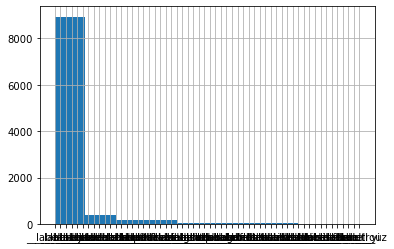

In [48]:
df2[1].hist()

In [59]:
g=df2.groupby([1]).size().reset_index()
g.sort_values(0,ascending=False)
# g

,1,0
11,__label__en,8530
21,__label__hu,238
13,__label__es,225
43,__label__sv,125
9,__label__de,106
55,__label__zh,85
25,__label__ja,78
17,__label__fr,44
32,__label__nl,35
24,__label__it,32
